<a href="https://www.kaggle.com/code/mithunks/carpricepredict?scriptVersionId=180395847" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-used-cars-dataset/used_cars_data.csv


In [2]:
#Reading dataset

In [3]:
cars_data = pd.read_csv(r'/kaggle/input/us-used-cars-dataset/used_cars_data.csv')

/tmp/ipykernel_19/322245122.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  cars_data = pd.read_csv(r'/kaggle/input/us-used-cars-dataset/used_cars_data.csv')


In [4]:
cars_data.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [5]:
cars_data.shape

(3000040, 66)

In [6]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   vin                      object 
 1   back_legroom             object 
 2   bed                      object 
 3   bed_height               object 
 4   bed_length               object 
 5   body_type                object 
 6   cabin                    object 
 7   city                     object 
 8   city_fuel_economy        float64
 9   combine_fuel_economy     float64
 10  daysonmarket             int64  
 11  dealer_zip               object 
 12  description              object 
 13  engine_cylinders         object 
 14  engine_displacement      float64
 15  engine_type              object 
 16  exterior_color           object 
 17  fleet                    object 
 18  frame_damaged            object 
 19  franchise_dealer         bool   
 20  franchise_make           object 
 21  front_le

In [7]:
#Extracting sedan cars info

In [8]:
sedan_data = cars_data[cars_data['body_type'] == 'Sedan']
sedan_data

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
6,3MZBPABL6KM107908,35.1 in,NaN,NaN,NaN,Sedan,NaN,Bayamon,NaN,NaN,...,A,6-Speed Automatic Overdrive,t85256,Sedan FWD,NaN,FWD,Front-Wheel Drive,107.3 in,70.7 in,2019
12,WBA8B7C53GK368522,35.1 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,22.0,NaN,...,A,8-Speed Automatic,t58802,340i xDrive Sedan AWD,NaN,AWD,All-Wheel Drive,110.6 in,80 in,2016
14,3MZBPABL1KM108237,35.1 in,NaN,NaN,NaN,Sedan,NaN,Bayamon,NaN,NaN,...,A,6-Speed Automatic Overdrive,t85256,Sedan FWD,NaN,FWD,Front-Wheel Drive,107.3 in,70.7 in,2019
15,3MZBPABL4KM107969,35.1 in,NaN,NaN,NaN,Sedan,NaN,Bayamon,NaN,NaN,...,A,6-Speed Automatic Overdrive,t85256,Sedan FWD,NaN,FWD,Front-Wheel Drive,107.3 in,70.7 in,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000023,4S3BNAF62J3044979,38.1 in,NaN,NaN,NaN,Sedan,NaN,Ukiah,25.0,NaN,...,CVT,Continuously Variable Transmission,t74842,2.5i Premium,NaN,AWD,All-Wheel Drive,108.3 in,81.3 in,2018
3000030,3FA6P0D96KR207676,38.3 in,NaN,NaN,NaN,Sedan,NaN,Fairfield,20.0,NaN,...,A,Automatic,t81778,Titanium AWD,NaN,AWD,All-Wheel Drive,112.2 in,83.5 in,2019
3000031,1N4AL3AP0JC274037,36.1 in,NaN,NaN,NaN,Sedan,NaN,Napa,26.0,NaN,...,CVT,Continuously Variable Transmission,t76331,2.5 SR,NaN,FWD,Front-Wheel Drive,109.3 in,72 in,2018
3000037,3FA6P0HD3GR134062,38.3 in,NaN,NaN,NaN,Sedan,NaN,Napa,NaN,NaN,...,A,6-Speed Automatic Overdrive,t57569,SE,NaN,FWD,Front-Wheel Drive,112.2 in,83.5 in,2016


In [9]:
#Data Cleaning

In [10]:
sedan_data = sedan_data.dropna(subset = ['price'])

In [11]:
sedan_data['engine_type'].unique()

array(['H4', 'I4', 'I6', nan, 'V6', 'V8', 'V6 Flex Fuel Vehicle',
       'V6 Hybrid', 'I4 Hybrid', 'I4 Flex Fuel Vehicle', 'I5',
       'I4 Diesel', 'I6 Diesel', 'V12', 'I3', 'V8 Flex Fuel Vehicle',
       'V6 Diesel', 'H6', 'W12', 'V10', 'V8 Hybrid',
       'W12 Flex Fuel Vehicle', 'I6 Hybrid', 'I4 Compressed Natural Gas',
       'I5 Diesel', 'V6 Compressed Natural Gas', 'W8',
       'V8 Compressed Natural Gas'], dtype=object)

In [12]:
#Converting required features into numerical categories

In [13]:
categorical_columns = ['city', 'engine_cylinders', 'engine_type', 'exterior_color', 'franchise_make', 'fuel_tank_volume', 'fuel_type', 
                       'has_accidents', 'interior_color', 'is_new', 'make_name', 'maximum_seating', 'model_name', 'transmission', 'wheel_system']
for col in categorical_columns:
    sedan_data[col] = sedan_data[col].astype('category').cat.codes

In [14]:
sedan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742036 entries, 2 to 3000038
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      742036 non-null  object 
 1   back_legroom             716369 non-null  object 
 2   bed                      3 non-null       object 
 3   bed_height               0 non-null       object 
 4   bed_length               0 non-null       object 
 5   body_type                742036 non-null  object 
 6   cabin                    0 non-null       object 
 7   city                     742036 non-null  int16  
 8   city_fuel_economy        660482 non-null  float64
 9   combine_fuel_economy     0 non-null       float64
 10  daysonmarket             742036 non-null  int64  
 11  dealer_zip               742036 non-null  object 
 12  description              727775 non-null  object 
 13  engine_cylinders         742036 non-null  int8   
 14  engine_d

In [15]:
#Exploratory Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


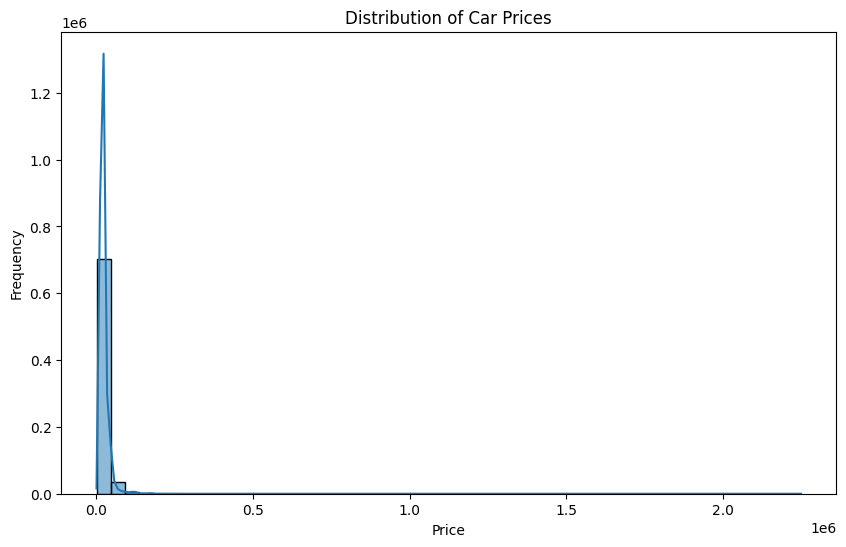

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(sedan_data['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [17]:
#Analysing data using categorical values - eg: wheel_system

In [18]:
sedan_data['wheel_system'].unique()

array([ 0,  1,  2, -1], dtype=int8)

In [19]:
subset1 = sedan_data[['price', 'wheel_system']]

In [20]:
subset1_encoded = pd.get_dummies(subset1, columns=['wheel_system'], drop_first=False)

In [21]:
correlation_matrix = subset1_encoded.corr()

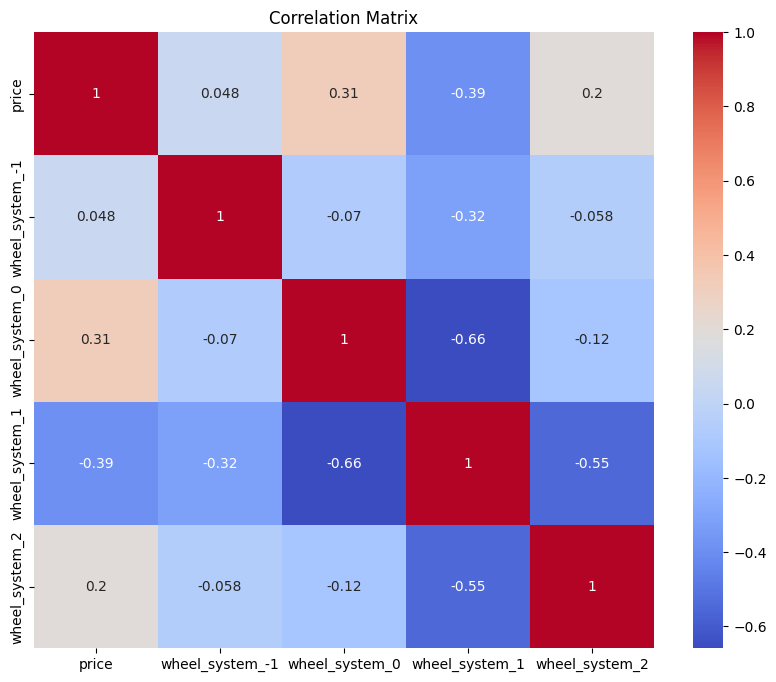

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
#Analysing data using overall trend of each features

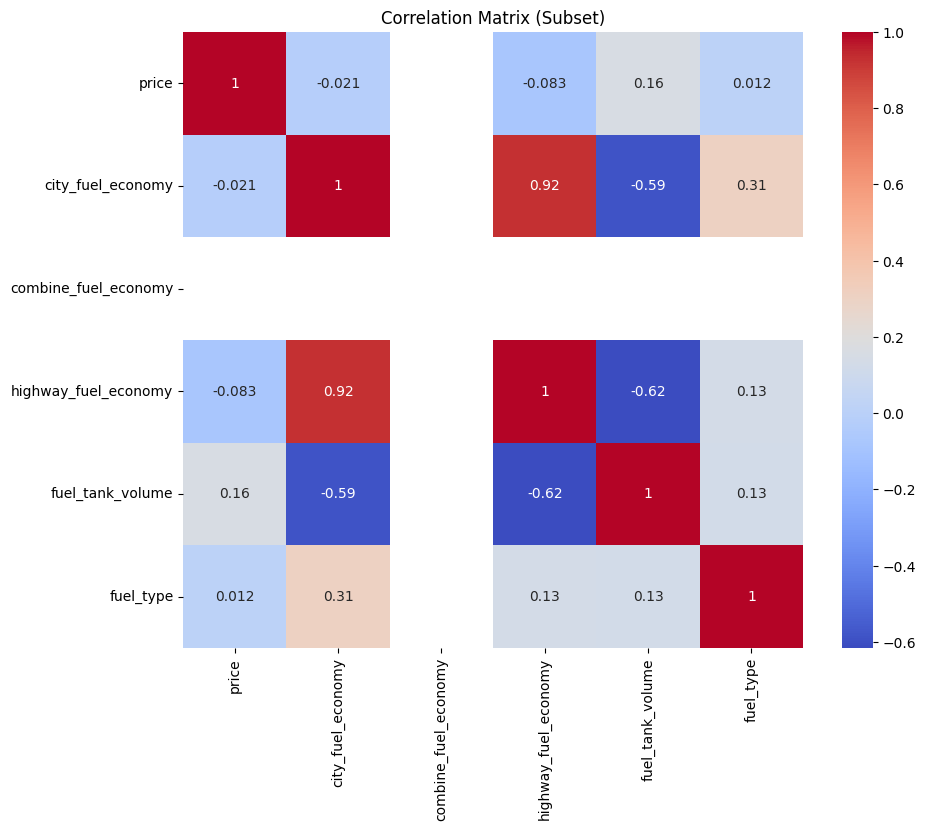

In [24]:
subset_columns = ['price', 'city_fuel_economy', 'combine_fuel_economy', 'highway_fuel_economy', 'fuel_tank_volume', 'fuel_type']
subset_correlation_matrix = sedan_data[subset_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

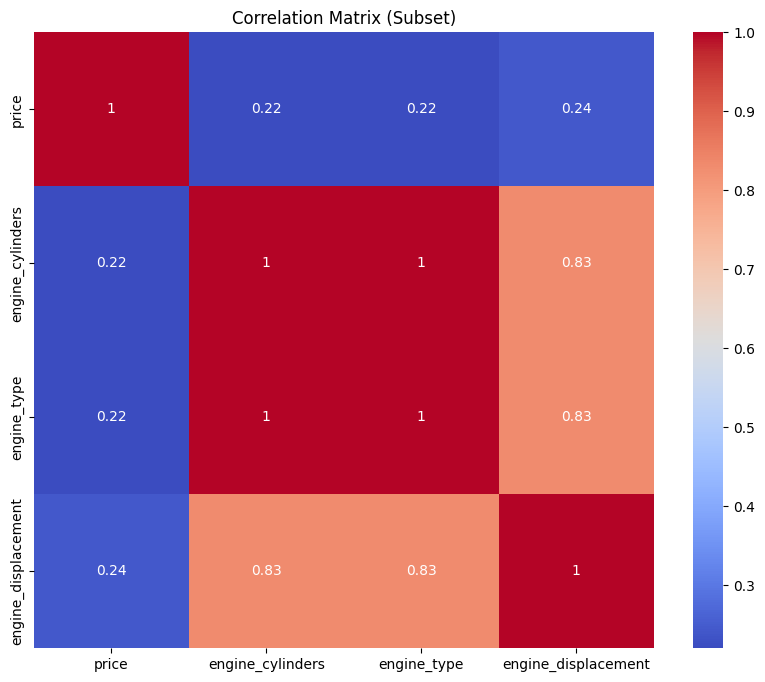

In [25]:
subset_columns = ['price', 'engine_cylinders', 'engine_type', 'engine_displacement']
subset_correlation_matrix = sedan_data[subset_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

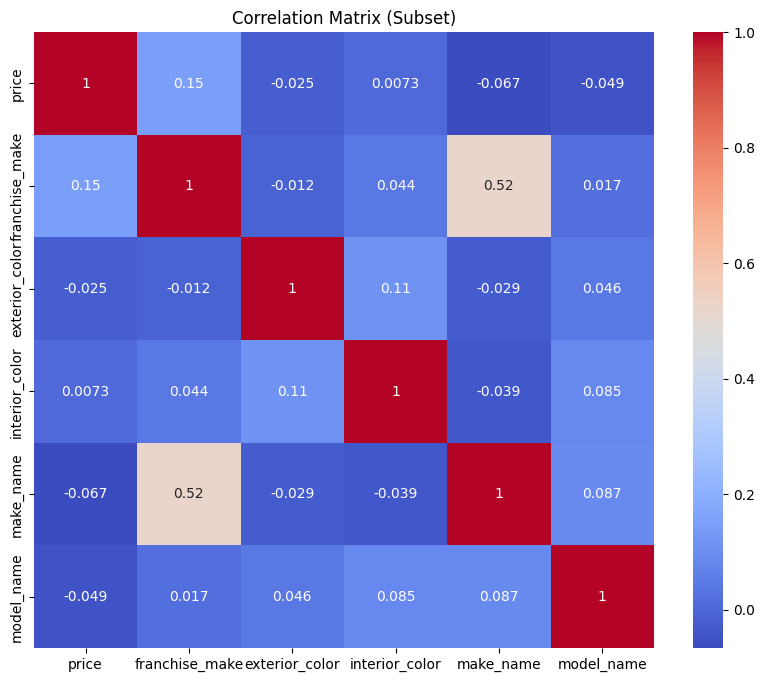

In [26]:
subset_columns = ['price', 'franchise_make', 'exterior_color', 'interior_color', 'make_name', 'model_name']
subset_correlation_matrix = sedan_data[subset_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

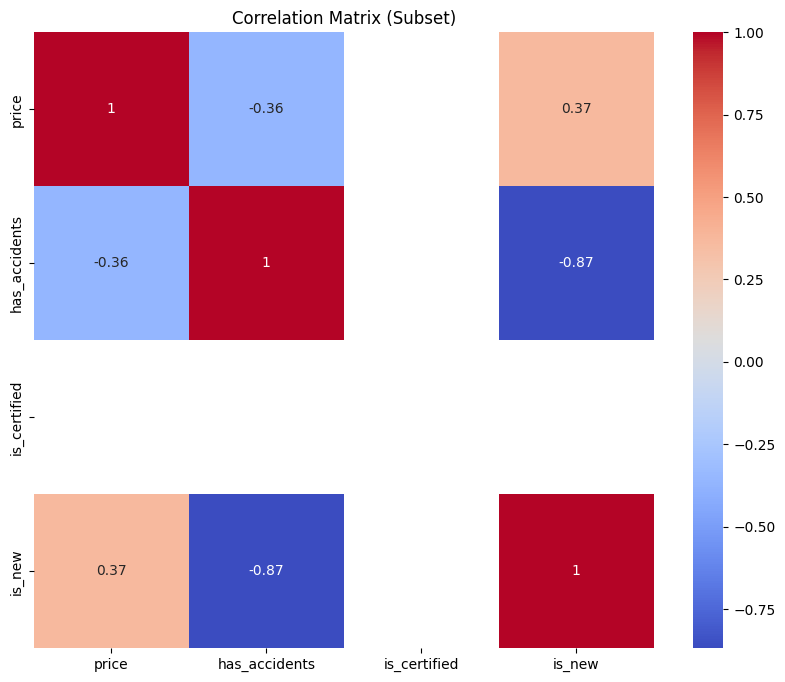

In [27]:
subset_columns = ['price', 'has_accidents', 'is_certified', 'is_new']
subset_correlation_matrix = sedan_data[subset_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

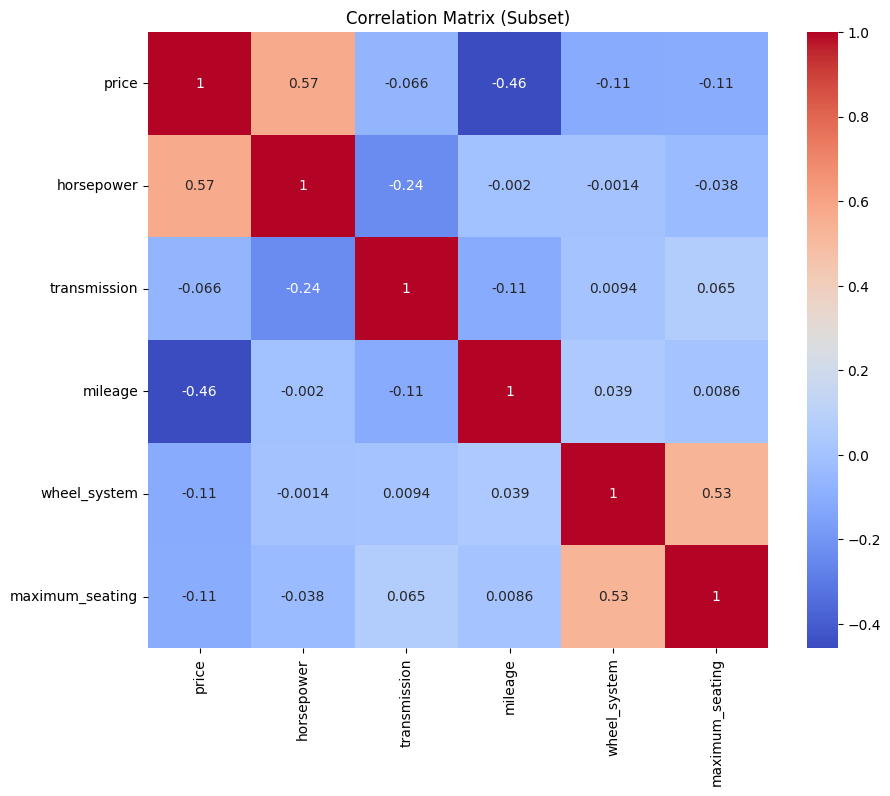

In [28]:
subset_columns = ['price', 'horsepower', 'transmission', 'mileage', 'wheel_system', 'maximum_seating']
subset_correlation_matrix = sedan_data[subset_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

In [29]:
#Analysing factors in favor of Nissan

In [30]:
nissan_data = cars_data[(cars_data['body_type'] == 'Sedan') & (cars_data['make_name'] == 'Nissan')]

In [31]:
nissan_data.shape

(87132, 66)

In [32]:
categorical_columns = ['city', 'engine_cylinders', 'engine_type', 'exterior_color', 'franchise_make', 'fuel_tank_volume', 'fuel_type', 
                       'has_accidents', 'interior_color', 'is_new', 'make_name', 'maximum_seating', 'model_name', 'transmission', 'wheel_system']
for col in categorical_columns:
    nissan_data[col] = nissan_data[col].astype('category').cat.codes

/tmp/ipykernel_19/1701998056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nissan_data[col] = nissan_data[col].astype('category').cat.codes
/tmp/ipykernel_19/1701998056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nissan_data[col] = nissan_data[col].astype('category').cat.codes
/tmp/ipykernel_19/1701998056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [33]:
nissan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87132 entries, 154 to 3000031
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vin                      87132 non-null  object 
 1   back_legroom             86735 non-null  object 
 2   bed                      0 non-null      object 
 3   bed_height               0 non-null      object 
 4   bed_length               0 non-null      object 
 5   body_type                87132 non-null  object 
 6   cabin                    0 non-null      object 
 7   city                     87132 non-null  int16  
 8   city_fuel_economy        81803 non-null  float64
 9   combine_fuel_economy     0 non-null      float64
 10  daysonmarket             87132 non-null  int64  
 11  dealer_zip               87132 non-null  object 
 12  description              85929 non-null  object 
 13  engine_cylinders         87132 non-null  int8   
 14  engine_displacement    

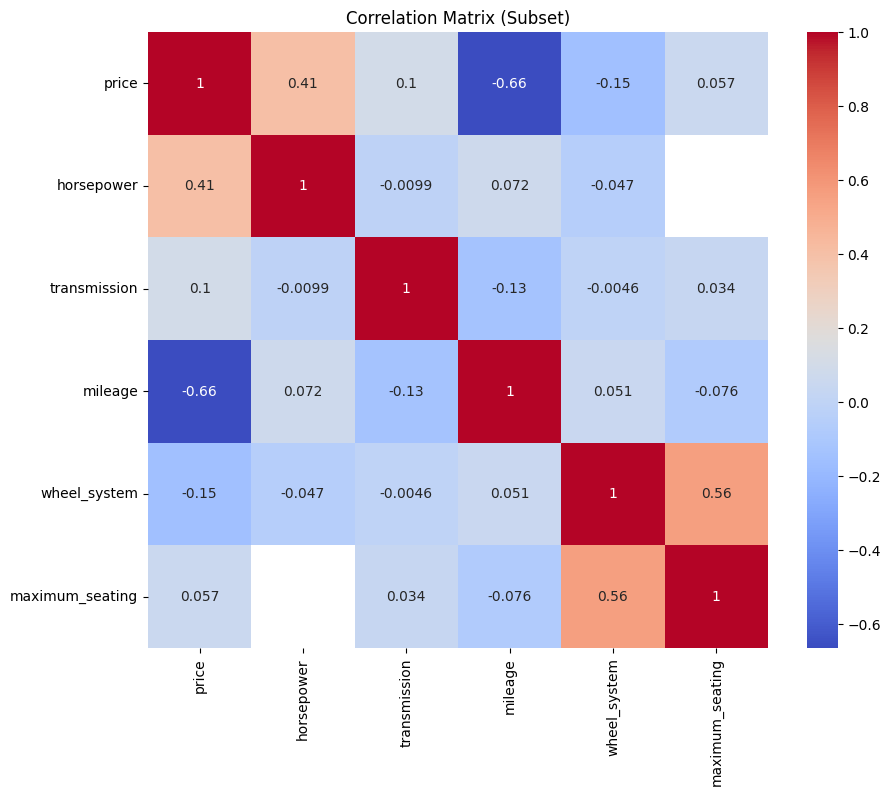

In [34]:
subset_columns = ['price', 'horsepower', 'transmission', 'mileage', 'wheel_system', 'maximum_seating']
subset_correlation_matrix = nissan_data[subset_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

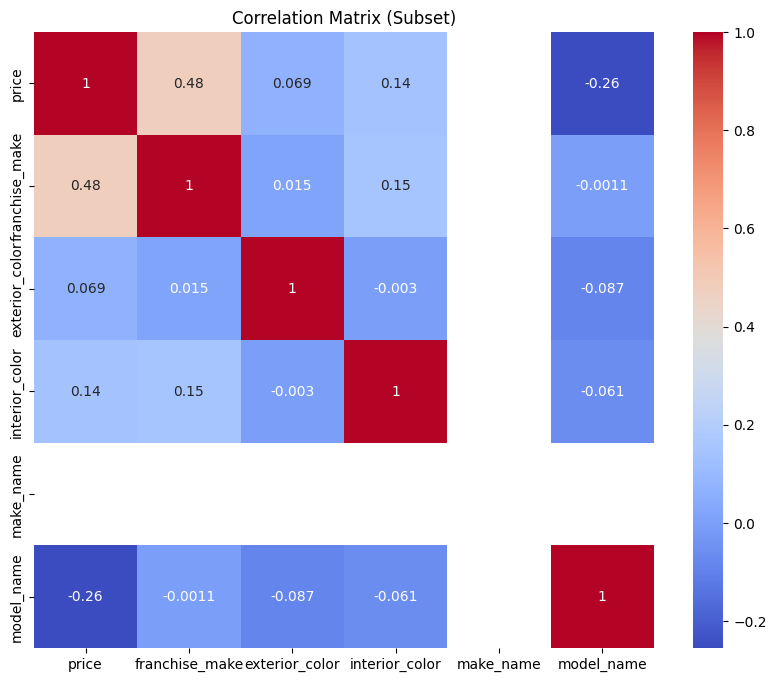

In [35]:
subset_columns = ['price', 'franchise_make', 'exterior_color', 'interior_color', 'make_name', 'model_name']
subset_correlation_matrix = nissan_data[subset_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

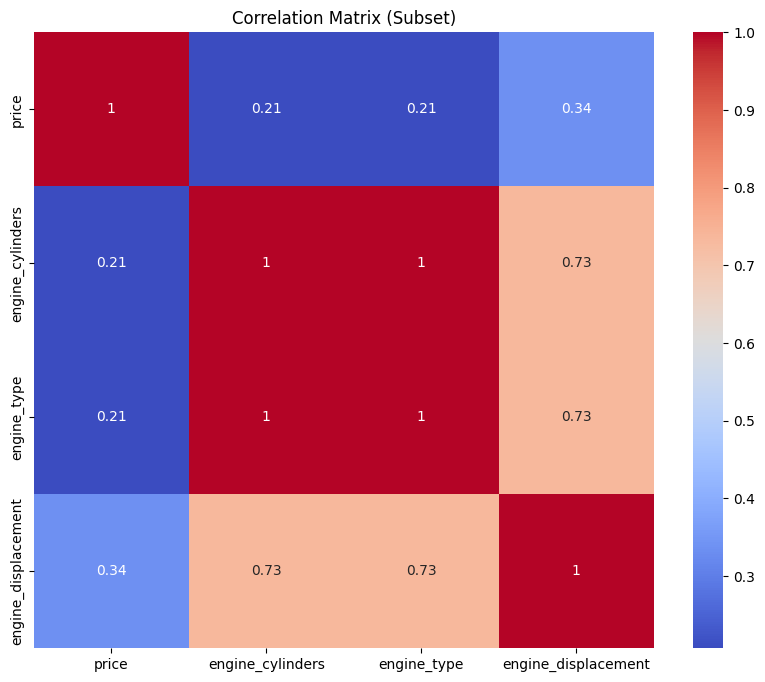

In [36]:
subset_columns = ['price', 'engine_cylinders', 'engine_type', 'engine_displacement']
subset_correlation_matrix = nissan_data[subset_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

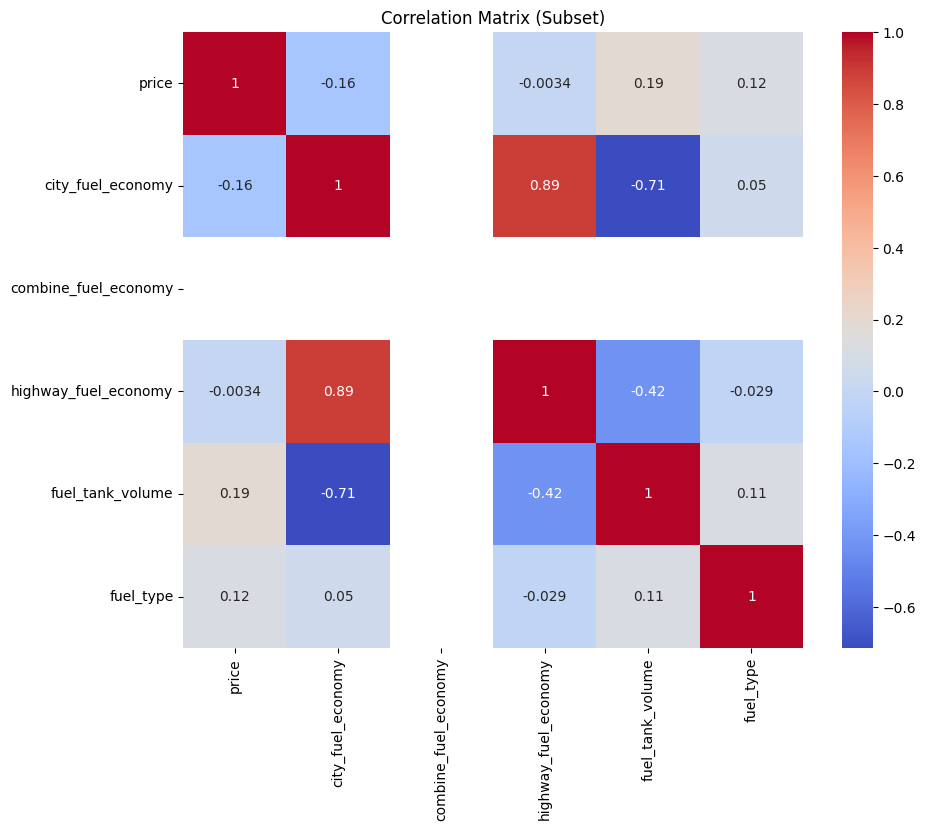

In [37]:
subset_columns = ['price', 'city_fuel_economy', 'combine_fuel_economy', 'highway_fuel_economy', 'fuel_tank_volume', 'fuel_type']
subset_correlation_matrix = nissan_data[subset_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

In [38]:
#Analysing factors in favor of Toyota

In [39]:
toyota_data = cars_data[(cars_data['body_type'] == 'Sedan') & (cars_data['make_name'] == 'Toyota')]

In [40]:
toyota_data.shape

(97865, 66)

In [41]:
categorical_columns = ['city', 'engine_cylinders', 'engine_type', 'exterior_color', 'franchise_make', 'fuel_tank_volume', 'fuel_type', 
                       'has_accidents', 'interior_color', 'is_new', 'make_name', 'maximum_seating', 'model_name', 'transmission', 'wheel_system']
for col in categorical_columns:
    toyota_data[col] = toyota_data[col].astype('category').cat.codes

/tmp/ipykernel_19/856967309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota_data[col] = toyota_data[col].astype('category').cat.codes
/tmp/ipykernel_19/856967309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota_data[col] = toyota_data[col].astype('category').cat.codes
/tmp/ipykernel_19/856967309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [42]:
toyota_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97865 entries, 413 to 3000003
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vin                      97865 non-null  object 
 1   back_legroom             94289 non-null  object 
 2   bed                      0 non-null      object 
 3   bed_height               0 non-null      object 
 4   bed_length               0 non-null      object 
 5   body_type                97865 non-null  object 
 6   cabin                    0 non-null      object 
 7   city                     97865 non-null  int16  
 8   city_fuel_economy        91032 non-null  float64
 9   combine_fuel_economy     0 non-null      float64
 10  daysonmarket             97865 non-null  int64  
 11  dealer_zip               97865 non-null  object 
 12  description              96162 non-null  object 
 13  engine_cylinders         97865 non-null  int8   
 14  engine_displacement    

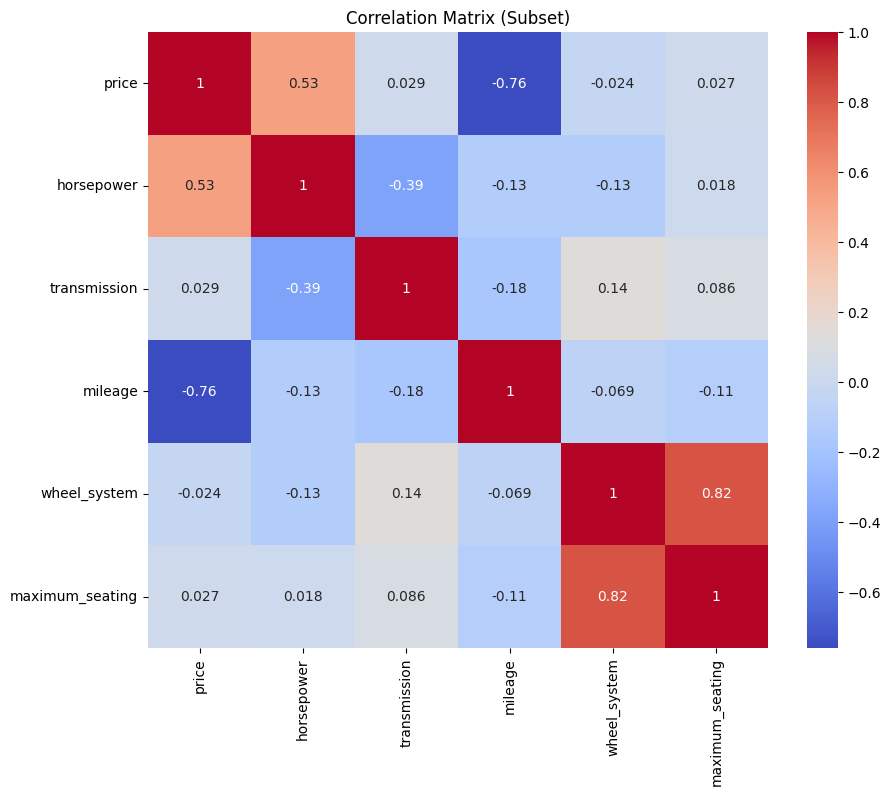

In [43]:
subset_columns = ['price', 'horsepower', 'transmission', 'mileage', 'wheel_system', 'maximum_seating']
subset_correlation_matrix = toyota_data[subset_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

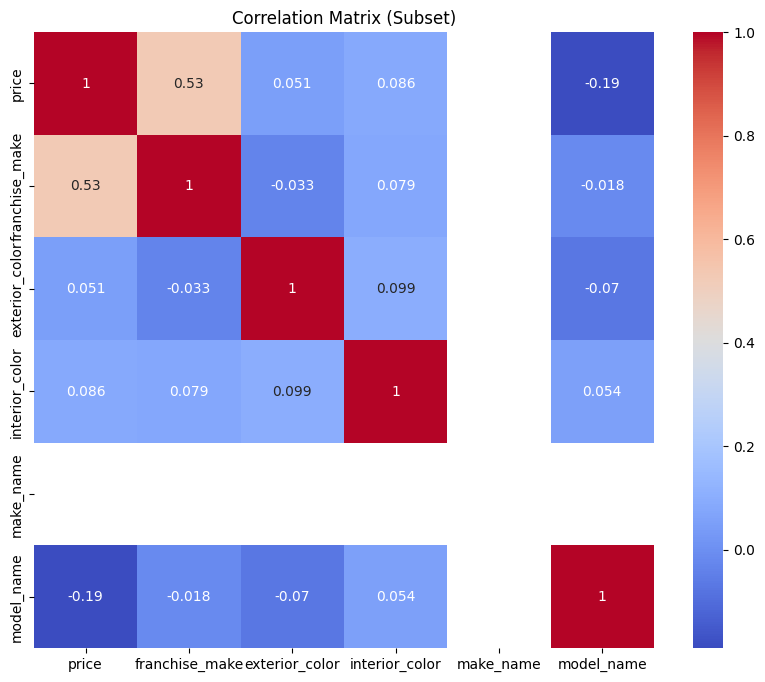

In [44]:
subset_columns = ['price', 'franchise_make', 'exterior_color', 'interior_color', 'make_name', 'model_name']
subset_correlation_matrix = toyota_data[subset_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

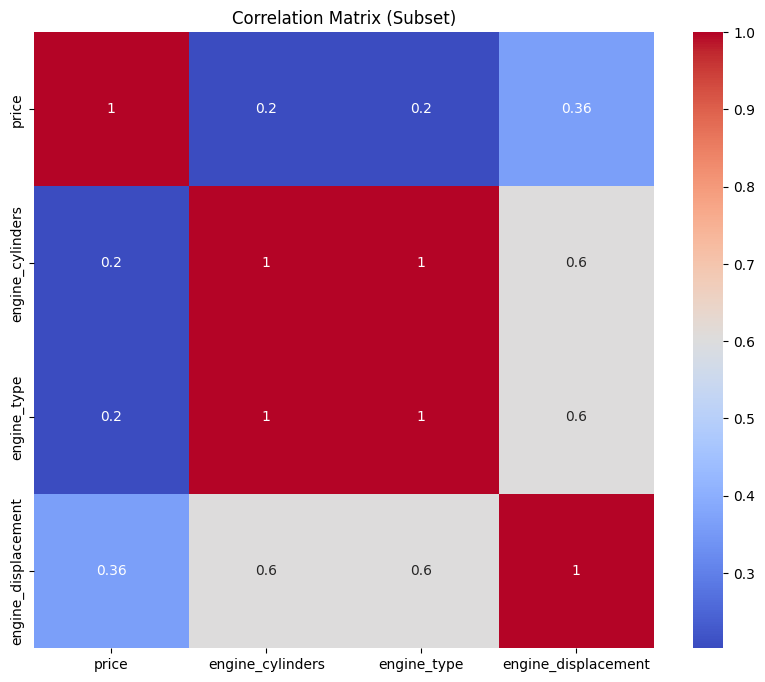

In [45]:
subset_columns = ['price', 'engine_cylinders', 'engine_type', 'engine_displacement']
subset_correlation_matrix = toyota_data[subset_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

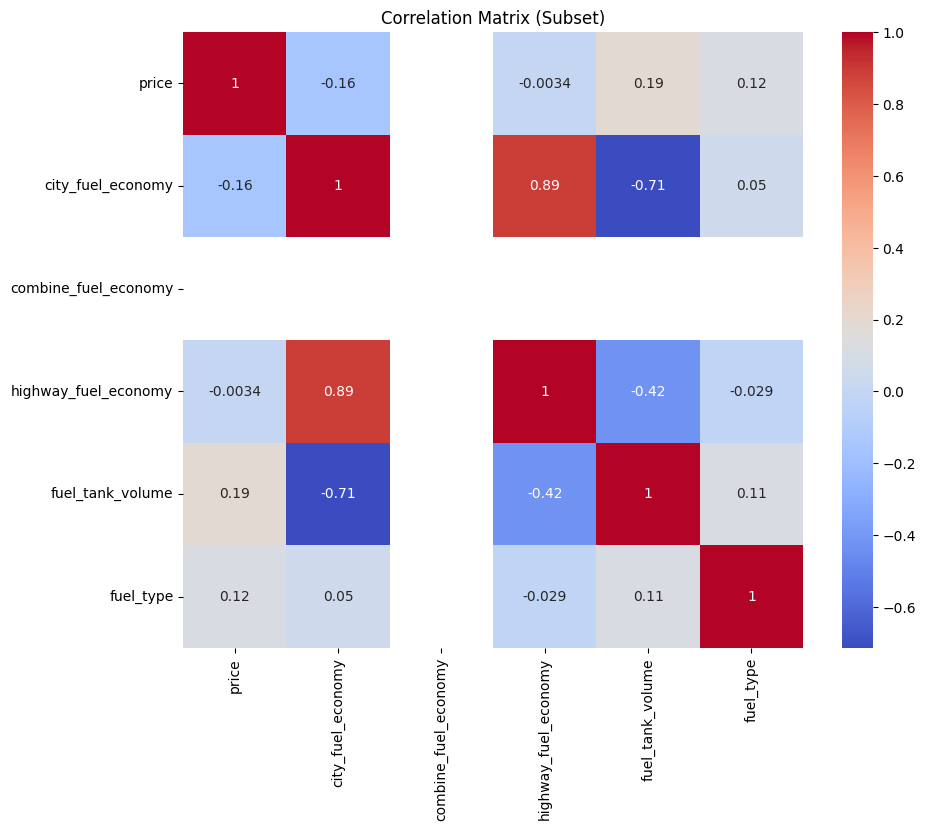

In [46]:
subset_columns = ['price', 'city_fuel_economy', 'combine_fuel_economy', 'highway_fuel_economy', 'fuel_tank_volume', 'fuel_type']
subset_correlation_matrix = nissan_data[subset_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

In [47]:
#Model Creation

In [48]:
numeric_data = sedan_data.select_dtypes(include=['number'])

In [49]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742036 entries, 2 to 3000038
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   city                     742036 non-null  int16  
 1   city_fuel_economy        660482 non-null  float64
 2   combine_fuel_economy     0 non-null       float64
 3   daysonmarket             742036 non-null  int64  
 4   engine_cylinders         742036 non-null  int8   
 5   engine_displacement      714597 non-null  float64
 6   engine_type              742036 non-null  int8   
 7   exterior_color           742036 non-null  int16  
 8   franchise_make           742036 non-null  int8   
 9   fuel_tank_volume         742036 non-null  int8   
 10  fuel_type                742036 non-null  int8   
 11  has_accidents            742036 non-null  int8   
 12  highway_fuel_economy     660482 non-null  float64
 13  horsepower               714597 non-null  float64
 14  interior

In [50]:
numeric_data.drop(columns = ['combine_fuel_economy', 'vehicle_damage_category', 'city', 'latitude', 'listing_id', 
                             'longitude', 'owner_count', 'savings_amount', 'seller_rating', 'sp_id'], inplace = True)

In [51]:
numeric_data.shape

(742036, 23)

In [52]:
numeric_data = numeric_data.fillna(0)

In [53]:
input_data = numeric_data.drop(columns = ['price'])
output_data = numeric_data['price']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.2)

In [55]:
model = LinearRegression()

In [56]:
model.fit(x_train, y_train)

LinearRegression()

In [57]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593628 entries, 2938611 to 601762
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city_fuel_economy     593628 non-null  float64
 1   daysonmarket          593628 non-null  int64  
 2   engine_cylinders      593628 non-null  int8   
 3   engine_displacement   593628 non-null  float64
 4   engine_type           593628 non-null  int8   
 5   exterior_color        593628 non-null  int16  
 6   franchise_make        593628 non-null  int8   
 7   fuel_tank_volume      593628 non-null  int8   
 8   fuel_type             593628 non-null  int8   
 9   has_accidents         593628 non-null  int8   
 10  highway_fuel_economy  593628 non-null  float64
 11  horsepower            593628 non-null  float64
 12  interior_color        593628 non-null  int16  
 13  is_certified          593628 non-null  float64
 14  is_new                593628 non-null  int8   
 15 

In [58]:
predict = model.predict(x_test)

In [59]:
predict

array([15962.6705634 ,  6169.28179409, 10482.86987776, ...,
       30327.68517724, 59286.78888669, 35615.12062388])

In [60]:
x_train.head(1).info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 2938611 to 2938611
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city_fuel_economy     1 non-null      float64
 1   daysonmarket          1 non-null      int64  
 2   engine_cylinders      1 non-null      int8   
 3   engine_displacement   1 non-null      float64
 4   engine_type           1 non-null      int8   
 5   exterior_color        1 non-null      int16  
 6   franchise_make        1 non-null      int8   
 7   fuel_tank_volume      1 non-null      int8   
 8   fuel_type             1 non-null      int8   
 9   has_accidents         1 non-null      int8   
 10  highway_fuel_economy  1 non-null      float64
 11  horsepower            1 non-null      float64
 12  interior_color        1 non-null      int16  
 13  is_certified          1 non-null      float64
 14  is_new                1 non-null      int8   
 15  make_name           

In [61]:
sedan_data['make_name'].unique()

array([48, 33,  6, 24, 10, 11, 34, 14, 22, 28, 38,  4, 29, 43, 52, 25,  9,
       51, 30, 17,  1, 53,  8, 35, 26, 45, 31, 36, 19, 46, 50, 16, 42,  2,
        7, 47, 44, 49,  3, 32, 27, 39, 41,  0, 15, 20, 13, 12, 21,  5, 37,
       40, 23, 18], dtype=int8)

In [62]:
sedan_data['franchise_make'].unique()

array([11, 20,  8,  9, 10, -1,  7, 21, 29,  3, 17, 13, 43, 25, 45, 44,  4,
       24, 42,  6, 40, 16, 33,  0, 18,  5, 35, 37, 31, 23, 19, 28,  1, 12,
       27, 32,  2, 30, 26, 15, 39, 14, 46, 22, 38, 41, 36, 34], dtype=int8)

In [63]:
x_train.head(1)

,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,exterior_color,franchise_make,fuel_tank_volume,fuel_type,has_accidents,...,interior_color,is_certified,is_new,make_name,maximum_seating,mileage,model_name,transmission,wheel_system,year
2938611,23.0,59,3,1800.0,3,1659,-1,57,4,1,...,-1,0.0,0,52,3,80692.0,308,0,1,2017


In [64]:
x_train.head(1).info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 2938611 to 2938611
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city_fuel_economy     1 non-null      float64
 1   daysonmarket          1 non-null      int64  
 2   engine_cylinders      1 non-null      int8   
 3   engine_displacement   1 non-null      float64
 4   engine_type           1 non-null      int8   
 5   exterior_color        1 non-null      int16  
 6   franchise_make        1 non-null      int8   
 7   fuel_tank_volume      1 non-null      int8   
 8   fuel_type             1 non-null      int8   
 9   has_accidents         1 non-null      int8   
 10  highway_fuel_economy  1 non-null      float64
 11  horsepower            1 non-null      float64
 12  interior_color        1 non-null      int16  
 13  is_certified          1 non-null      float64
 14  is_new                1 non-null      int8   
 15  make_name           

In [65]:
input_data_model_1 = pd.DataFrame([[21.0, 96, 3, 2000.0, 3, 1753, 23, 50, 4, -1, 31.0, 237.0, 8076, 0.0, 1, 11, 3, 2.0, 87, 0, 0, 2020]], columns = ['city_fuel_economy', 'daysonmarket', 'engine_cylinders', 'engine_displacement', 'engine_type', 'exterior_color', 'franchise_make', 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'highway_fuel_economy', 'horsepower', 'interior_color', 'is_certified', 'is_new', 'make_name', 'maximum_seating', 'mileage', 'model_name', 'transmission', 'wheel_system', 'year']) 

In [66]:
input_data_model_2 = pd.DataFrame([[21.0, 96, 3, 2000.0, 3, 1753, 13, 50, 4, -1, 31.0, 237.0, 8076, 0.0, 1, 18, 3, 2.0, 87, 0, 0, 2020]], columns = ['city_fuel_economy', 'daysonmarket', 'engine_cylinders', 'engine_displacement', 'engine_type', 'exterior_color', 'franchise_make', 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'highway_fuel_economy', 'horsepower', 'interior_color', 'is_certified', 'is_new', 'make_name', 'maximum_seating', 'mileage', 'model_name', 'transmission', 'wheel_system', 'year']) 

In [67]:
model.predict(input_data_model_1)

array([37609.64790666])

In [68]:
model.predict(input_data_model_2)

array([37916.69640535])

In [69]:
import pickle as pk

In [70]:
pk.dump(model,open('model.pkl', 'wb'))